# Chemicalize logD INP classification performance analysis
Dataset: 60 experimentally tested drugs for IR783 indocyanine nanoparticle(INP) formation.  
LogD values were calculated by Chemicalize (https://chemicalize.com/).

In [1]:
import pandas as pd
import numpy as np
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from __future__ import print_function
from __future__ import division

In [3]:
# Creating dataframe for the list of molecules
path = "./"
filename="chemicalize_logD_file_list.txt"
file = open(os.path.join(path, filename), "r")

logD_filename_list = []
for line in file:
    logD_filename_list.append(line.split('\n')[0])

print(len(logD_filename_list))
print(logD_filename_list[:5])

60
['ABT737.logd.csv', 'AZD-4547.logd.csv', 'Apitolisib.logd.csv', 'Avagacestat.logd.csv', 'Avasimibe.logd.csv']


In [4]:
df_exp60_logD = pd.DataFrame(logD_filename_list)
df_exp60_logD.columns= ["File Name"]
print(df_exp60_logD.size)

df_exp60_logD["NAME"] = None
df_exp60_logD["pH=4.5"] = None
df_exp60_logD["pH=7.4"] = None
df_exp60_logD["pH=8.0"] = None
df_exp60_logD["pH=9.0"] = None

for i, row in enumerate(df_exp60_logD.iterrows()):
    df_exp60_logD.ix[i,"NAME"] = re.split("[.]", df_exp60_logD.ix[i,"File Name"])[0]
    
df_exp60_logD.head()

60


,File Name,NAME,pH=4.5,pH=7.4,pH=8.0,pH=9.0
0,ABT737.logd.csv,ABT737,None,None,None,None
1,AZD-4547.logd.csv,AZD-4547,None,None,None,None
2,Apitolisib.logd.csv,Apitolisib,None,None,None,None
3,Avagacestat.logd.csv,Avagacestat,None,None,None,None
4,Avasimibe.logd.csv,Avasimibe,None,None,None,None


In [5]:
path = "./chemicalize_logD_data_60_mol/"

for i, logD_filename in enumerate(logD_filename_list):
    
    # read each logD file to a list
    filename=logD_filename
    file = open(os.path.join(path, filename), "r")
    
    # write components of pH, logD list to a dictionary
    pH_logD_dict = {}
    for line in file:
        pH_logD_dict[line.split('\n')[0].split(",")[0]]=line.split('\n')[0].split(",")[1]
    
    # write logD of relevant pH to dataframe df_exp52_logD 
    df_exp60_logD.ix[i, "pH=4.5"] = pH_logD_dict["4.5"]
    df_exp60_logD.ix[i, "pH=7.4"] = pH_logD_dict["7.4"]
    df_exp60_logD.ix[i, "pH=8.0"] = pH_logD_dict["8.0"]
    df_exp60_logD.ix[i, "pH=9.0"] = pH_logD_dict["9.0"]
    
df_exp60_logD.head()

,File Name,NAME,pH=4.5,pH=7.4,pH=8.0,pH=9.0
0,ABT737.logd.csv,ABT737,3.85,6.43,6.93,7.48
1,AZD-4547.logd.csv,AZD-4547,1.13,2.73,3.29,4.04
2,Apitolisib.logd.csv,Apitolisib,-0.73,1.43,1.50,1.52
3,Avagacestat.logd.csv,Avagacestat,3.96,3.96,3.96,3.96
4,Avasimibe.logd.csv,Avasimibe,9.03,8.68,8.26,7.33


### Import  and match with experimental data of INP formation
From Manuscript Supplementary Table II. + 8 new molecules.

In [6]:
# read SpMax data from csv data
exp_data_path = "./"
filename="experimentally_tested_INP_formation_data_from_manuscript_60_mol.csv"
exp_data_file = os.path.join(exp_data_path, filename)

# create a dataframe for spmax data
df_exp_data = pd.read_csv(exp_data_file, sep=",", header=0)
    
# Merge LogD and SpMax DataFrames
df_exp60_logD= pd.merge(df_exp60_logD, df_exp_data, on=["NAME"])
print(df_exp60_logD.size)
print(df_exp60_logD.shape)
df_exp60_logD.head()

600
(60, 10)


,File Name,NAME,pH=4.5,pH=7.4,pH=8.0,pH=9.0,SpMAX4_Bh(s),ALOGP2,Forms,Group
0,ABT737.logd.csv,ABT737,3.85,6.43,6.93,7.48,7.000,67.200,Yes,Validation
1,AZD-4547.logd.csv,AZD-4547,1.13,2.73,3.29,4.04,4.720,17.700,No,Validation
2,Apitolisib.logd.csv,Apitolisib,-0.73,1.43,1.50,1.52,5.010,1.800,No,Validation
3,Avagacestat.logd.csv,Avagacestat,3.96,3.96,3.96,3.96,8.000,16.000,Yes,Validation
4,Avasimibe.logd.csv,Avasimibe,9.03,8.68,8.26,7.33,4.786,67.695,Yes,Validation


### 1. LogD vs LogD rank

In [7]:
# Convert data type to float before sorting
df_exp60_logD[["pH=4.5","pH=7.4", "pH=8.0", "pH=9.0"]] = df_exp60_logD[["pH=4.5","pH=7.4", "pH=8.0", "pH=9.0"]].apply(pd.to_numeric)
df_exp60_logD.dtypes

File Name        object
NAME             object
pH=4.5          float64
pH=7.4          float64
pH=8.0          float64
pH=9.0          float64
SpMAX4_Bh(s)    float64
ALOGP2          float64
Forms            object
Group            object
dtype: object

/Users/isikm/opt/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


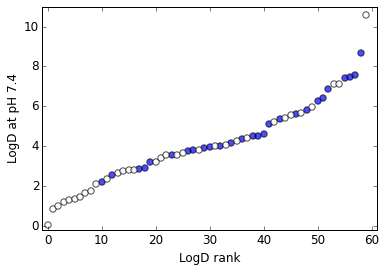

In [8]:
pH_list = ["pH=7.4"]

plt.rcParams.update({'font.size': 12})
fig = plt.figure(1, figsize=(4*len(pH_list)+2,4))

for i, pH in enumerate(pH_list):
    
    df_exp_sorted = df_exp60_logD.sort_values(by=pH, ascending=1).reset_index(drop=True)
    df_exp_sorted["LogD rank"]=df_exp_sorted.index
#df_exp_sorted.head()

    df_exp_yes_sorted = df_exp_sorted.loc[df_exp_sorted["Forms"] == "Yes"].reset_index(drop=True)
    df_exp_no_sorted = df_exp_sorted.loc[df_exp_sorted["Forms"] == "No"].reset_index(drop=True)
#df_exp_no_sorted.head() 

    LogD_array_yes_sorted = df_exp_yes_sorted.ix[:,pH]
    LogD_rank_array_yes_sorted = df_exp_yes_sorted.ix[:,"LogD rank"]
    LogD_array_no_sorted = df_exp_no_sorted.ix[:,pH]
    LogD_rank_array_no_sorted = df_exp_no_sorted.ix[:,"LogD rank"]

    #plt.subplot(1,len(pH_list),(i+1))
    plt.scatter(LogD_rank_array_yes_sorted, LogD_array_yes_sorted, alpha=0.7, c="b", s=40)
    plt.scatter(LogD_rank_array_no_sorted, LogD_array_no_sorted, alpha=0.7,  c="w", s=40)
    plt.xlabel("LogD rank")
    plt.ylabel("LogD at pH 7.4")
    plt.xlim(-1,61)
    plt.ylim(-0.2,11)
    
plt.savefig("LogD_rank.png", dpi=200)
plt.savefig("LogD_rank.svg")

### 2. LogD Box Plot

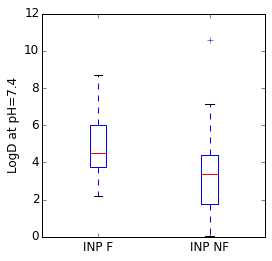

In [9]:
df_exp_yes = df_exp60_logD.loc[df_exp60_logD["Forms"] == "Yes"].reset_index(drop=True)
df_exp_no = df_exp60_logD.loc[df_exp60_logD["Forms"] == "No"].reset_index(drop=True)

pH_list = ["pH=7.4"]

fig = plt.figure(1, figsize=(4*len(pH_list),4))

#pH = "pH=7.4"
for i, pH in enumerate(pH_list):
    
    LogD_array_yes = df_exp_yes.ix[:,pH].astype(float)
    LogD_array_no = df_exp_no.ix[:,pH].astype(float)

    data=[LogD_array_yes, LogD_array_no]
   
    #ax= fig.add_subplot(111)
    ax = plt.subplot(1,len(pH_list),(i+1))
    ax.boxplot(data)
    ax.set_xticklabels(["INP F","INP NF"])
    ax.set_ylabel("LogD at {}".format(pH))

    
fig.savefig("LogD_boxplot.png", dpi=200)
fig.savefig("LogD_boxplot.svg")

In [10]:
# t-test and 95% CI
from scipy import stats
import numpy as np, statsmodels.stats.api as sms

for i, pH in enumerate(pH_list):
    LogD_array_yes = df_exp_yes.ix[:,pH].astype(float)
    LogD_array_no = df_exp_no.ix[:,pH].astype(float)
    
    print(pH+ ": ", stats.ttest_ind(LogD_array_yes, LogD_array_no, equal_var=False))
    
    cm = sms.CompareMeans(sms.DescrStatsW(LogD_array_yes), sms.DescrStatsW(LogD_array_no))
    print("   95% CI: ", cm.tconfint_diff(usevar='unequal'))

pH=7.4:  Ttest_indResult(statistic=2.63834141916817, pvalue=0.010685987682019079)
   95% CI:  (0.32216587300575039, 2.3486085377686612)


### 3. Logistic regression

In [11]:
from scipy import optimize

def logistic(params,x):
    """ 
    Logistic function

    Parameters
    ----------
    params : list or numpy array
      the three parameters of the logistic function
      First parameter is set to 1 to make funtion to
      span 0 to 1 range.
    x : numpy array
      the explanatory variable
   
    Return
    ------
    numpy array
      the output of the logistic function

    """
    params[0]=1
    return params[0]/(1+np.exp(-x*params[1] - params[2])) 

def residuals(params):
    predicted = logistic(params,x)
    return np.sum((y-predicted)**2)

In [12]:
# Indocyanine nanoparticle formation binary response column
df_exp60_logD["NP?"]=None

for i,row in enumerate(df_exp60_logD.iterrows()):
    if df_exp60_logD.ix[i,"Forms"] == "Yes" :
        df_exp60_logD.ix[i, "NP?"] = 1
    else:
        df_exp60_logD.ix[i, "NP?"] = 0

df_exp60_logD.head()

,File Name,NAME,pH=4.5,pH=7.4,pH=8.0,pH=9.0,SpMAX4_Bh(s),ALOGP2,Forms,Group,NP?
0,ABT737.logd.csv,ABT737,3.85,6.43,6.93,7.48,7.000,67.200,Yes,Validation,1
1,AZD-4547.logd.csv,AZD-4547,1.13,2.73,3.29,4.04,4.720,17.700,No,Validation,0
2,Apitolisib.logd.csv,Apitolisib,-0.73,1.43,1.50,1.52,5.010,1.800,No,Validation,0
3,Avagacestat.logd.csv,Avagacestat,3.96,3.96,3.96,3.96,8.000,16.000,Yes,Validation,1
4,Avasimibe.logd.csv,Avasimibe,9.03,8.68,8.26,7.33,4.786,67.695,Yes,Validation,1


For pH=7.4: The predicted parameters are [ 1.          0.3944592  -1.74864548]
            Threshold logD:  4.43301987297


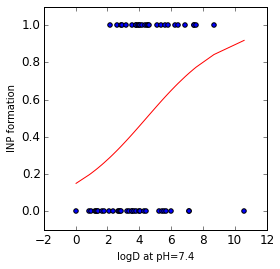

In [13]:
pH_list = ["pH=7.4"]
threshold_logD = {}

fig = plt.figure(1, figsize=(4*len(pH_list),4))

for i, pH in enumerate(pH_list):

    df_sorted = df_exp60_logD.sort_values(by=pH, ascending=1).reset_index(drop=True)
    initial_guess = [1,1,1]
    x=df_sorted.ix[:, pH].astype(float)
    y=df_sorted.ix[:, "NP?"]

    fit = optimize.minimize(residuals,initial_guess,method='Nelder-Mead')
    print("For {}: The predicted parameters are".format(pH), fit.x)
    
    # Inflection point is x_0/b
    threshold_logD[pH]=(-1)*fit.x[2]/fit.x[1]
    print("            Threshold logD: ", threshold_logD[pH])
    
    plt.subplot(1,len(pH_list),(i+1))
    plt.scatter(x,y)
    predicted = logistic(fit.x, x)
    plt.plot(x,predicted,color="red")
    plt.xlabel('logD at {}'.format(pH), size=10)
    plt.ylabel('INP formation', size=10)
    plt.ylim(-0.1,1.1)
    
plt.savefig("LogD_logistic_fit.png", dpi=200)
plt.savefig("LogD_logistic_fit.svg")

### 4. ROC Curve and AUC

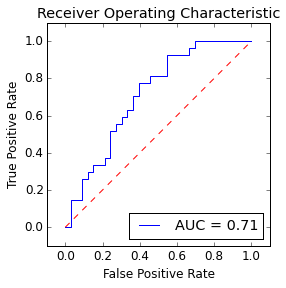

In [14]:
from sklearn import metrics

y_actual = df_sorted["NP?"]
# predicted score come from logistic regression
y_predicted = predicted

# ROC
fpr, tpr, thresholds = metrics.roc_curve(y_actual, y_predicted)
roc_auc = metrics.auc(fpr, tpr)

# Plotting ROC curve
fig = plt.figure(1, figsize=(4,4))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Bootstrap for ROC AUC confidence intervals

Original ROC area: 0.714
95% Confidence interval for the score: [0.579 - 0.839]


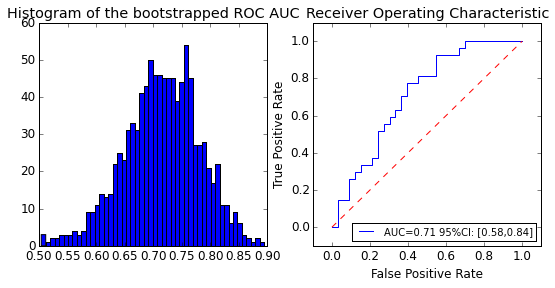

In [15]:
y_actual = np.array(y_actual).astype(int)
y_predicted = np.array(y_predicted)
print("Original ROC area: {:0.3f}".format(metrics.roc_auc_score(y_actual, y_predicted)))

n_bootstraps = 1000
rng_seed = 0  # control reproducibility
bootstrapped_scores = []

rng = np.random.RandomState(rng_seed)
for i in range(n_bootstraps):

    # bootstrap by sampling with replacement on the prediction indices
    indices = rng.random_integers(0, len(y_predicted) - 1, len(y_predicted))
 
    if len(np.unique(y_actual[indices])) < 2:
        # We need at least one positive and one negative sample for ROC AUC
        # to be defined: reject the sample
        continue

    score = metrics.roc_auc_score(y_actual[indices], y_predicted[indices])
    bootstrapped_scores.append(score)
    #print("Bootstrap #{} ROC area: {:0.3f}".format(i + 1, score))

fig = plt.figure(1, figsize=(9,4))
plt.subplot(1,2,1)
plt.hist(bootstrapped_scores, bins=50)
plt.title('Histogram of the bootstrapped ROC AUC')
# plt.show()

sorted_scores = np.array(bootstrapped_scores)
sorted_scores.sort()

# Computing the lower and upper bound of the 95% confidence interval
# 95% CI percentiles to 0.025 and 0.975
confidence_lower = sorted_scores[int(0.025 * len(sorted_scores))]
confidence_upper = sorted_scores[int(0.975 * len(sorted_scores))]
print("95% Confidence interval for the score: [{:0.3f} - {:0.3}]".format(
    confidence_lower, confidence_upper))

# Plotting ROC curve
fig = plt.figure(1, figsize=(4,4))
plt.subplot(1,2,2)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC={0:0.2f} 95%CI: [{1:0.2f},{2:0.2f}]'.format(roc_auc, confidence_lower, confidence_upper))
plt.legend(loc='lower right', prop={'size':10})
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig("logD_ROC_with_histogram.png", dpi=200)
plt.savefig("logD_ROC_with_histogram.svg")

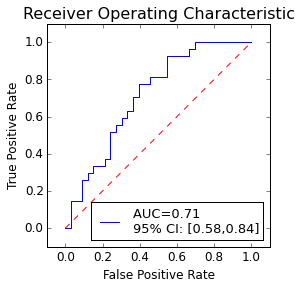

In [16]:
# Plotting ROC curve
fig = plt.figure(1, figsize=(4,4))
plt.title('Receiver Operating Characteristic', size=16)
plt.plot(fpr, tpr, 'b', label='AUC={0:0.2f} \n95% CI: [{1:0.2f},{2:0.2f}]'.format(roc_auc, confidence_lower, confidence_upper))
plt.legend(loc='lower right', prop={'size':13})
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig("pH74_logD_ROC.png", dpi=200)
plt.savefig("pH74_logD_ROC.svg")

### 5. Confusion Matrix

In [17]:
df_exp60_logD_pred = df_exp60_logD.ix[:, ("NAME", "NP?", "pH=7.4")]
for pH in pH_list:
    df_exp60_logD_pred["NP Pred {}".format(pH)]= None
    
    for i, row in enumerate(df_exp60_logD_pred.iterrows()):
        logD = float(df_exp60_logD_pred.ix[i, pH])
        
        if logD < threshold_logD[pH]:
            df_exp60_logD_pred.ix[i, "NP Pred {}".format(pH)] = 0
        else:
            df_exp60_logD_pred.ix[i, "NP Pred {}".format(pH)] = 1
df_exp60_logD_pred.head()

,NAME,NP?,pH=7.4,NP Pred pH=7.4
0,ABT737,1,6.43,1
1,AZD-4547,0,2.73,0
2,Apitolisib,0,1.43,0
3,Avagacestat,1,3.96,0
4,Avasimibe,1,8.68,1


In [18]:
exp_NP = df_exp60_logD_pred.ix[:,"NP?"].astype(int)

pred_NP_dict = {}
for pH in pH_list:
    pred_NP_dict[pH] = df_exp60_logD_pred.ix[:, "NP Pred {}".format(pH)].astype(int)
    
for pH in pH_list:
    actual = pd.Series(exp_NP, name= "Actual")
    predicted = pd.Series(pred_NP_dict[pH], name= "Predicted")
    df_confusion = pd.crosstab(actual, predicted)
    
    # Accuracy = (TP+TN)/(TP+TN+FP+FN)
    TP = df_confusion.ix[1,1]
    TN = df_confusion.ix[0,0]
    FP = df_confusion.ix[0,1]
    FN = df_confusion.ix[1,0]
    
    accuracy = (TP+TN)/(TP+TN+FP+FN)
    
    print("logD at", pH, "\nAccuracy= {:.2f}".format(accuracy), )
    print("logD threshold= {:.2f}\n".format(threshold_logD["pH=7.4"]))
    print(df_confusion)

logD at pH=7.4 
Accuracy= 0.65
logD threshold= 4.43

Predicted   0   1
Actual           
0          25   8
1          13  14
